# Import packages

In [1]:
import pandas as pd

#--- Load packages for datasets---
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

#--- Load packages for logistic regression and random forest---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#--- Load packages for train/test split---
from sklearn.model_selection import train_test_split

#import plotting libraries to visualise underfitting/overfitting
import matplotlib.pyplot as plt
#import gridsearch to find optimum value
from sklearn.model_selection import GridSearchCV

In [2]:
#To ignore max_iter warning
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression

## Creating functions for convenience of calculation

In [3]:
#Returns the training error on a value of C
def lr_train(C):
    clf = LogisticRegression(C = C, random_state=3)
    clf.fit(X_train,y_train)
    
    return 1-clf.score(X_train,y_train)

#Returns the testing error on a value of C
def lr_test(C):
    clf = LogisticRegression(C = C, random_state=3)
    clf.fit(X_train,y_train)
    
    return 1-clf.score(X_test,y_test)

### Dataset Iris

In [4]:
# Load Iris dataset
X, y = load_iris(return_X_y=True)
# Split train/test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 3)

In [5]:
train_acc = []
test_acc = []

testrange = [10**x for x in range(-10,3)]

for i in testrange:
    train_acc.append(lr_train(i))
    test_acc.append(lr_test(i))  


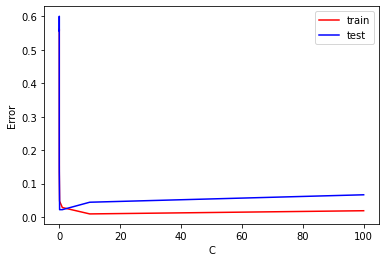

In [6]:
#Plotting error

plt.plot(testrange,train_acc,'r',label='train')
plt.plot(testrange,test_acc,'b',label='test')
plt.xlabel("C")
plt.ylabel("Error")
plt.legend()
plt.show()

In [7]:
train_acc2 = []
test_acc2 = []
testrange2 = [0.00001*x for x in range(1,10000)]
for i in testrange2:
    train_acc2.append(lr_train(i))
    test_acc2.append(lr_test(i))  

#Plotting error



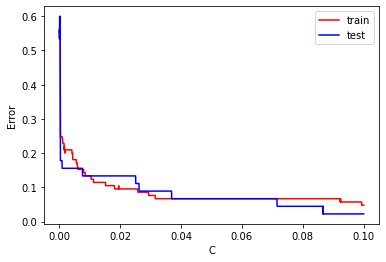

In [8]:
plt.plot(testrange2,train_acc2,'r',label='train')
plt.plot(testrange2,test_acc2,'b',label='test')
plt.xlabel("C")
plt.ylabel("Error")
plt.legend()
plt.show()

In [9]:
train_acc3 = []
test_acc3 = []
testrange3 = [0.02*x for x in range(1, 301)]

for i in testrange3:
    train_acc3.append(lr_train(i))
    test_acc3.append(lr_test(i))  

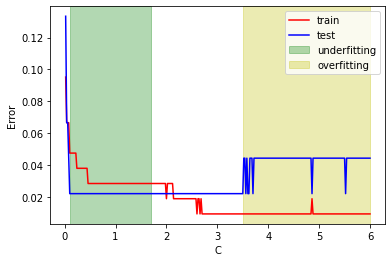

In [10]:
#Plotting error

plt.plot(testrange3,train_acc3,'r',label='train')
plt.plot(testrange3,test_acc3,'b',label='test')
plt.xlabel("C")
plt.ylabel("Error")
plt.axvspan(0.1, 1.7, color='g', alpha=0.3,label = "underfitting")
plt.axvspan(3.5, 6, color='y', alpha=0.3,label='overfitting')
plt.legend()
plt.show()

### Attempt at using Gridsearch to find optimum value

In [11]:
searchspace = [10**x for x in range(-10,10)]
grid = {"C":searchspace}

In [12]:
lr = LogisticRegression(random_state=3)
model_lr = GridSearchCV(estimator = lr, param_grid=grid, verbose = 4)

In [13]:
model_lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...........................C=1e-10;, score=0.333 total time=   0.0s
[CV 2/5] END ...........................C=1e-10;, score=0.381 total time=   0.0s
[CV 3/5] END ...........................C=1e-10;, score=0.381 total time=   0.0s
[CV 4/5] END ...........................C=1e-10;, score=0.476 total time=   0.0s
[CV 5/5] END ...........................C=1e-10;, score=0.333 total time=   0.1s
[CV 1/5] END ...........................C=1e-09;, score=0.333 total time=   0.0s
[CV 2/5] END ...........................C=1e-09;, score=0.381 total time=   0.0s
[CV 3/5] END ...........................C=1e-09;, score=0.381 total time=   0.0s
[CV 4/5] END ...........................C=1e-09;, score=0.476 total time=   0.0s
[CV 5/5] END ...........................C=1e-09;, score=0.333 total time=   0.0s
[CV 1/5] END ...........................C=1e-08;, score=0.333 total time=   0.0s
[CV 2/5] END ...........................C=1e-08

GridSearchCV(estimator=LogisticRegression(random_state=3),
             param_grid={'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                               0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000, 1000000, 10000000, 100000000,
                               1000000000]},
             verbose=4)

In [14]:
print(model_lr.best_estimator_) 

#Best estimate within one order of magnitude is C=1

LogisticRegression(C=1, random_state=3)


In [15]:
grid = {"C":[0.1*i for i in range(1,200)]}
lr = LogisticRegression(random_state=3)
model_lr = GridSearchCV(estimator = lr, param_grid=grid, verbose = 4)
model_lr.fit(X_train,y_train)

Fitting 5 folds for each of 199 candidates, totalling 995 fits
[CV 1/5] END .............................C=0.1;, score=0.857 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.952 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.952 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.857 total time=   0.0s
[CV 1/5] END .............................C=0.2;, score=0.905 total time=   0.0s
[CV 2/5] END .............................C=0.2;, score=0.952 total time=   0.0s
[CV 3/5] END .............................C=0.2;, score=1.000 total time=   0.0s
[CV 4/5] END .............................C=0.2;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=0.2;, score=0.857 total time=   0.0s
[CV 1/5] END .............C=0.30000000000000004;, score=0.905 total time=   0.0s
[CV 2/5] END .............C=0.3000000000000000

[CV 3/5] END .............................C=2.1;, score=1.000 total time=   0.0s
[CV 4/5] END .............................C=2.1;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=2.1;, score=0.905 total time=   0.0s
[CV 1/5] END .............................C=2.2;, score=0.905 total time=   0.0s
[CV 2/5] END .............................C=2.2;, score=1.000 total time=   0.0s
[CV 3/5] END .............................C=2.2;, score=1.000 total time=   0.0s
[CV 4/5] END .............................C=2.2;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=2.2;, score=0.905 total time=   0.0s
[CV 1/5] END ..............C=2.3000000000000003;, score=0.905 total time=   0.0s
[CV 2/5] END ..............C=2.3000000000000003;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C=2.3000000000000003;, score=1.000 total time=   0.0s
[CV 4/5] END ..............C=2.3000000000000003;, score=1.000 total time=   0.0s
[CV 5/5] END ..............C

[CV 4/5] END .............................C=4.2;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=4.2;, score=0.905 total time=   0.0s
[CV 1/5] END .............................C=4.3;, score=0.905 total time=   0.0s
[CV 2/5] END .............................C=4.3;, score=1.000 total time=   0.0s
[CV 3/5] END .............................C=4.3;, score=1.000 total time=   0.0s
[CV 4/5] END .............................C=4.3;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=4.3;, score=0.905 total time=   0.0s
[CV 1/5] END .............................C=4.4;, score=0.905 total time=   0.0s
[CV 2/5] END .............................C=4.4;, score=1.000 total time=   0.0s
[CV 3/5] END .............................C=4.4;, score=1.000 total time=   0.0s
[CV 4/5] END .............................C=4.4;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=4.4;, score=0.905 total time=   0.0s
[CV 1/5] END ...............

[CV 1/5] END .............................C=6.4;, score=0.905 total time=   0.0s
[CV 2/5] END .............................C=6.4;, score=1.000 total time=   0.0s
[CV 3/5] END .............................C=6.4;, score=0.952 total time=   0.0s
[CV 4/5] END .............................C=6.4;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=6.4;, score=0.905 total time=   0.0s
[CV 1/5] END .............................C=6.5;, score=0.905 total time=   0.0s
[CV 2/5] END .............................C=6.5;, score=1.000 total time=   0.0s
[CV 3/5] END .............................C=6.5;, score=0.952 total time=   0.0s
[CV 4/5] END .............................C=6.5;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=6.5;, score=0.905 total time=   0.0s
[CV 1/5] END ..............C=6.6000000000000005;, score=0.905 total time=   0.0s
[CV 2/5] END ..............C=6.6000000000000005;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C

[CV 1/5] END .............................C=8.6;, score=0.905 total time=   0.0s
[CV 2/5] END .............................C=8.6;, score=1.000 total time=   0.0s
[CV 3/5] END .............................C=8.6;, score=0.952 total time=   0.0s
[CV 4/5] END .............................C=8.6;, score=1.000 total time=   0.0s
[CV 5/5] END .............................C=8.6;, score=0.905 total time=   0.0s
[CV 1/5] END ...............C=8.700000000000001;, score=0.905 total time=   0.0s
[CV 2/5] END ...............C=8.700000000000001;, score=1.000 total time=   0.0s
[CV 3/5] END ...............C=8.700000000000001;, score=0.952 total time=   0.0s
[CV 4/5] END ...............C=8.700000000000001;, score=1.000 total time=   0.0s
[CV 5/5] END ...............C=8.700000000000001;, score=0.905 total time=   0.0s
[CV 1/5] END .............................C=8.8;, score=0.905 total time=   0.0s
[CV 2/5] END .............................C=8.8;, score=1.000 total time=   0.0s
[CV 3/5] END ...............

[CV 3/5] END ..............C=10.700000000000001;, score=0.952 total time=   0.0s
[CV 4/5] END ..............C=10.700000000000001;, score=1.000 total time=   0.0s
[CV 5/5] END ..............C=10.700000000000001;, score=0.905 total time=   0.0s
[CV 1/5] END ............................C=10.8;, score=0.905 total time=   0.0s
[CV 2/5] END ............................C=10.8;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=10.8;, score=0.952 total time=   0.0s
[CV 4/5] END ............................C=10.8;, score=1.000 total time=   0.0s
[CV 5/5] END ............................C=10.8;, score=0.905 total time=   0.0s
[CV 1/5] END ............................C=10.9;, score=0.905 total time=   0.0s
[CV 2/5] END ............................C=10.9;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=10.9;, score=0.952 total time=   0.0s
[CV 4/5] END ............................C=10.9;, score=1.000 total time=   0.0s
[CV 5/5] END ...............

[CV 3/5] END ............................C=12.8;, score=0.952 total time=   0.0s
[CV 4/5] END ............................C=12.8;, score=1.000 total time=   0.0s
[CV 5/5] END ............................C=12.8;, score=0.905 total time=   0.0s
[CV 1/5] END ............................C=12.9;, score=0.905 total time=   0.0s
[CV 2/5] END ............................C=12.9;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=12.9;, score=0.952 total time=   0.0s
[CV 4/5] END ............................C=12.9;, score=1.000 total time=   0.0s
[CV 5/5] END ............................C=12.9;, score=0.905 total time=   0.0s
[CV 1/5] END ............................C=13.0;, score=0.905 total time=   0.0s
[CV 2/5] END ............................C=13.0;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=13.0;, score=0.952 total time=   0.0s
[CV 4/5] END ............................C=13.0;, score=1.000 total time=   0.0s
[CV 5/5] END ...............

[CV 1/5] END ............................C=15.0;, score=0.905 total time=   0.0s
[CV 2/5] END ............................C=15.0;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=15.0;, score=0.952 total time=   0.0s
[CV 4/5] END ............................C=15.0;, score=1.000 total time=   0.0s
[CV 5/5] END ............................C=15.0;, score=0.905 total time=   0.0s
[CV 1/5] END ..............C=15.100000000000001;, score=0.905 total time=   0.0s
[CV 2/5] END ..............C=15.100000000000001;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C=15.100000000000001;, score=0.952 total time=   0.0s
[CV 4/5] END ..............C=15.100000000000001;, score=1.000 total time=   0.0s
[CV 5/5] END ..............C=15.100000000000001;, score=0.905 total time=   0.0s
[CV 1/5] END ..............C=15.200000000000001;, score=0.905 total time=   0.0s
[CV 2/5] END ..............C=15.200000000000001;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C

[CV 5/5] END ............................C=17.1;, score=0.905 total time=   0.0s
[CV 1/5] END ............................C=17.2;, score=0.905 total time=   0.0s
[CV 2/5] END ............................C=17.2;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=17.2;, score=0.952 total time=   0.0s
[CV 4/5] END ............................C=17.2;, score=1.000 total time=   0.0s
[CV 5/5] END ............................C=17.2;, score=0.905 total time=   0.0s
[CV 1/5] END ............................C=17.3;, score=0.905 total time=   0.0s
[CV 2/5] END ............................C=17.3;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=17.3;, score=0.952 total time=   0.0s
[CV 4/5] END ............................C=17.3;, score=1.000 total time=   0.0s
[CV 5/5] END ............................C=17.3;, score=0.905 total time=   0.0s
[CV 1/5] END ..............C=17.400000000000002;, score=0.905 total time=   0.0s
[CV 2/5] END ..............C

[CV 2/5] END ..............C=19.200000000000003;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C=19.200000000000003;, score=0.952 total time=   0.0s
[CV 4/5] END ..............C=19.200000000000003;, score=1.000 total time=   0.0s
[CV 5/5] END ..............C=19.200000000000003;, score=0.905 total time=   0.0s
[CV 1/5] END ............................C=19.3;, score=0.905 total time=   0.0s
[CV 2/5] END ............................C=19.3;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=19.3;, score=0.952 total time=   0.0s
[CV 4/5] END ............................C=19.3;, score=1.000 total time=   0.0s
[CV 5/5] END ............................C=19.3;, score=0.905 total time=   0.0s
[CV 1/5] END ..............C=19.400000000000002;, score=0.905 total time=   0.0s
[CV 2/5] END ..............C=19.400000000000002;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C=19.400000000000002;, score=0.952 total time=   0.0s
[CV 4/5] END ..............C

GridSearchCV(estimator=LogisticRegression(random_state=3),
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8, 0.9,
                               1.0, 1.1, 1.2000000000000002, 1.3,
                               1.4000000000000001, 1.5, 1.6, 1.7000000000000002,
                               1.8, 1.9000000000000001, 2.0, 2.1, 2.2,
                               2.3000000000000003, 2.4000000000000004, 2.5, 2.6,
                               2.7, 2.8000000000000003, 2.9000000000000004, 3.0, ...]},
             verbose=4)

In [16]:
print(model_lr.best_estimator_) #Within epsilon of 0.1 , the best fit model is C = 1.8 
                                #which is in the same range as determined above

LogisticRegression(C=1.8, random_state=3)


In [17]:
model_lr.score(X_train,y_train)

0.9714285714285714

In [18]:
# #Begin bisection method on the train error and the test error on (0.1,10)

# epsilon = 1e-10

# left = 0.1
# right = 10

# while True:
#     mid = (left+right)/2
#     print(mid,lr_train(mid))
    
#     if (abs(right-left) < epsilon): # or (lr_train(left)==lr_train(right)):
#         print("C = ", mid)
#         ans = mid
#         break
    
#     elif lr_train(left) > lr_train(right):
#         right = mid
    
#     else:
#         left = mid

# lr_tuned = LogisticRegression(C = ans,random_state=3)
# lr_tuned.fit(X_train,y_train)

# print('train ',lr_tuned.score(X_train, y_train))

# print('test ',lr_tuned.score(X_test, y_test))  

# #This method is not useful as it leads to overfitting hence it is not implemented

In [19]:
# Initialize a logistic regression model
# Here, you only need to tune the inverse regularization parameter `C`
#lr = LogisticRegression(C=1e-10, random_state=3) 

In [20]:
# Start training
#lr.fit(X_train, y_train)

In [21]:
# Show training set error
#1 - lr.score(X_train, y_train)
# Show testing set error
#1 - lr.score(X_test, y_test)

## Wine Dataset

In [22]:
# Load Wine dataset
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 1)

In [23]:
train_acc = []
test_acc = []

testrange = [10**x for x in range(-10,10)]

for i in testrange:
    train_acc.append(lr_train(i))
    test_acc.append(lr_test(i))  

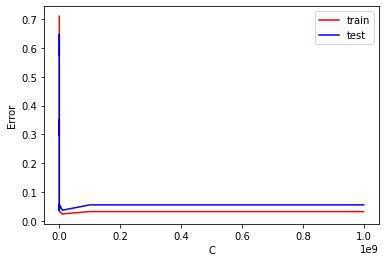

In [24]:
#Plotting error

plt.plot(testrange,train_acc,'r',label='train')
plt.plot(testrange,test_acc,'b',label='test')
plt.xlabel("C")
plt.ylabel("Error")
plt.legend()
plt.show()

In [25]:
train_acc2 = []
test_acc2 = []
testrange2 = [0.01,0.1,1,10,100]
for i in testrange2:
    train_acc2.append(lr_train(i))
    test_acc2.append(lr_test(i))  


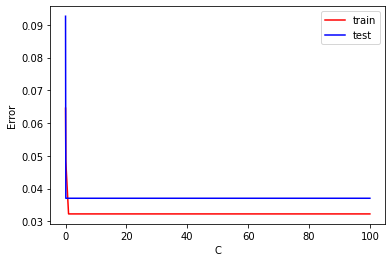

In [26]:

#Plotting error

plt.plot(testrange2,train_acc2,'r',label='train')
plt.plot(testrange2,test_acc2,'b',label='test')
plt.xlabel("C")
plt.ylabel("Error")
plt.legend()
plt.show()

In [27]:
train_acc4 = []
test_acc4 = []
testrange4 = [0.001,0.01,0.1,1,10,100,1000,10000,100000]

for i in testrange4:
    train_acc4.append(lr_train(i))
    test_acc4.append(lr_test(i))  

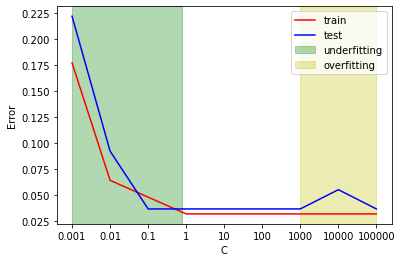

In [28]:
#Plotting error

xaxis = list(map(str,testrange4))

plt.plot(xaxis,train_acc4,'r',label='train')
plt.plot(xaxis,test_acc4,'b',label='test')
plt.xlabel("C")
plt.ylabel("Error")
plt.axvspan(0, 2.9, color='g', alpha=0.3,label='underfitting')
plt.axvspan(6, 8, color='y', alpha=0.3,label='overfitting')
plt.legend()
plt.show()

In [29]:
searchspace = [10**x for x in range(-10,10)]
grid = {"C":searchspace}

In [30]:
searchspace = [10**x for x in range(-10,10)]
grid = {"C":searchspace}
lr = LogisticRegression(random_state=3)
model_lr = GridSearchCV(estimator = lr, param_grid=grid, verbose = 4)

In [31]:
model_lr = GridSearchCV(estimator = lr, param_grid=grid, verbose = 4)

In [32]:
model_lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...........................C=1e-10;, score=0.280 total time=   0.0s
[CV 2/5] END ...........................C=1e-10;, score=0.280 total time=   0.0s
[CV 3/5] END ...........................C=1e-10;, score=0.320 total time=   0.0s
[CV 4/5] END ...........................C=1e-10;, score=0.280 total time=   0.0s
[CV 5/5] END ...........................C=1e-10;, score=0.292 total time=   0.0s
[CV 1/5] END ...........................C=1e-09;, score=0.440 total time=   0.0s
[CV 2/5] END ...........................C=1e-09;, score=0.440 total time=   0.0s
[CV 3/5] END ...........................C=1e-09;, score=0.400 total time=   0.0s
[CV 4/5] END ...........................C=1e-09;, score=0.400 total time=   0.0s
[CV 5/5] END ...........................C=1e-09;, score=0.417 total time=   0.0s
[CV 1/5] END ...........................C=1e-08;, score=0.440 total time=   0.0s
[CV 2/5] END ...........................C=1e-08

GridSearchCV(estimator=LogisticRegression(random_state=3),
             param_grid={'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                               0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000, 1000000, 10000000, 100000000,
                               1000000000]},
             verbose=4)

In [33]:
print(model_lr.best_estimator_) 

#Best estimate within one order of magnitude is C=10

LogisticRegression(C=10, random_state=3)


In [34]:
grid = {"C":[0.1*x for x in range(1, 1001)]}
lr = LogisticRegression(random_state=3)
model_lr = GridSearchCV(estimator = lr, param_grid=grid, verbose = 4)
model_lr.fit(X_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5] END .............................C=0.1;, score=0.920 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.960 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.960 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.880 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.917 total time=   0.0s
[CV 1/5] END .............................C=0.2;, score=0.920 total time=   0.0s
[CV 2/5] END .............................C=0.2;, score=0.960 total time=   0.0s
[CV 3/5] END .............................C=0.2;, score=0.960 total time=   0.0s
[CV 4/5] END .............................C=0.2;, score=0.880 total time=   0.0s
[CV 5/5] END .............................C=0.2;, score=0.917 total time=   0.0s
[CV 1/5] END .............C=0.30000000000000004;, score=0.920 total time=   0.0s
[CV 2/5] END .............C=0.30000000000000

[CV 2/5] END .............................C=2.1;, score=0.960 total time=   0.0s
[CV 3/5] END .............................C=2.1;, score=0.960 total time=   0.0s
[CV 4/5] END .............................C=2.1;, score=0.920 total time=   0.0s
[CV 5/5] END .............................C=2.1;, score=0.917 total time=   0.0s
[CV 1/5] END .............................C=2.2;, score=0.920 total time=   0.0s
[CV 2/5] END .............................C=2.2;, score=0.960 total time=   0.0s
[CV 3/5] END .............................C=2.2;, score=0.960 total time=   0.0s
[CV 4/5] END .............................C=2.2;, score=0.920 total time=   0.0s
[CV 5/5] END .............................C=2.2;, score=0.875 total time=   0.0s
[CV 1/5] END ..............C=2.3000000000000003;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=2.3000000000000003;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C=2.3000000000000003;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C

[CV 4/5] END ..............C=4.1000000000000005;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=4.1000000000000005;, score=0.917 total time=   0.0s
[CV 1/5] END .............................C=4.2;, score=0.920 total time=   0.0s
[CV 2/5] END .............................C=4.2;, score=0.960 total time=   0.0s
[CV 3/5] END .............................C=4.2;, score=0.960 total time=   0.0s
[CV 4/5] END .............................C=4.2;, score=0.920 total time=   0.0s
[CV 5/5] END .............................C=4.2;, score=0.917 total time=   0.0s
[CV 1/5] END .............................C=4.3;, score=0.920 total time=   0.0s
[CV 2/5] END .............................C=4.3;, score=0.960 total time=   0.0s
[CV 3/5] END .............................C=4.3;, score=0.960 total time=   0.0s
[CV 4/5] END .............................C=4.3;, score=0.920 total time=   0.0s
[CV 5/5] END .............................C=4.3;, score=0.917 total time=   0.0s
[CV 1/5] END ...............

[CV 5/5] END .............................C=6.2;, score=0.917 total time=   0.0s
[CV 1/5] END ...............C=6.300000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ...............C=6.300000000000001;, score=0.960 total time=   0.0s
[CV 3/5] END ...............C=6.300000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ...............C=6.300000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ...............C=6.300000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END .............................C=6.4;, score=0.920 total time=   0.0s
[CV 2/5] END .............................C=6.4;, score=1.000 total time=   0.0s
[CV 3/5] END .............................C=6.4;, score=0.960 total time=   0.0s
[CV 4/5] END .............................C=6.4;, score=0.920 total time=   0.0s
[CV 5/5] END .............................C=6.4;, score=0.917 total time=   0.0s
[CV 1/5] END .............................C=6.5;, score=0.920 total time=   0.0s
[CV 2/5] END ...............

[CV 1/5] END .............................C=8.4;, score=0.920 total time=   0.0s
[CV 2/5] END .............................C=8.4;, score=0.960 total time=   0.0s
[CV 3/5] END .............................C=8.4;, score=0.960 total time=   0.0s
[CV 4/5] END .............................C=8.4;, score=0.920 total time=   0.0s
[CV 5/5] END .............................C=8.4;, score=0.917 total time=   0.0s
[CV 1/5] END .............................C=8.5;, score=0.920 total time=   0.0s
[CV 2/5] END .............................C=8.5;, score=1.000 total time=   0.0s
[CV 3/5] END .............................C=8.5;, score=0.960 total time=   0.0s
[CV 4/5] END .............................C=8.5;, score=0.920 total time=   0.0s
[CV 5/5] END .............................C=8.5;, score=0.917 total time=   0.0s
[CV 1/5] END .............................C=8.6;, score=0.920 total time=   0.0s
[CV 2/5] END .............................C=8.6;, score=0.960 total time=   0.0s
[CV 3/5] END ...............

[CV 3/5] END ............................C=10.5;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=10.5;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=10.5;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=10.600000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=10.600000000000001;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=10.600000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=10.600000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=10.600000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=10.700000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=10.700000000000001;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C=10.700000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=10.700000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C

[CV 1/5] END ..............C=12.700000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=12.700000000000001;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=12.700000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=12.700000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=12.700000000000001;, score=0.875 total time=   0.0s
[CV 1/5] END ............................C=12.8;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=12.8;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=12.8;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=12.8;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=12.8;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=12.9;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=12.9;, score=0.960 total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END ............................C=14.8;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=14.8;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=14.8;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=14.8;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=14.8;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=14.9;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=14.9;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=14.9;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=14.9;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=14.9;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=15.0;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=15.0;, score=0.960 total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END ............................C=17.0;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=17.0;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=17.0;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=17.0;, score=0.880 total time=   0.0s
[CV 5/5] END ............................C=17.0;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=17.1;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=17.1;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=17.1;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=17.1;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=17.1;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=17.2;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=17.2;, score=1.000 total time=   0.0s
[CV 3/5] END ...............

[CV 3/5] END ............................C=19.1;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=19.1;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=19.1;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=19.200000000000003;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=19.200000000000003;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=19.200000000000003;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=19.200000000000003;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=19.200000000000003;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=19.3;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=19.3;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=19.3;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=19.3;, score=0.920 total time=   0.0s
[CV 5/5] END ...............

[CV 2/5] END ..............C=21.200000000000003;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=21.200000000000003;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=21.200000000000003;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=21.200000000000003;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=21.3;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=21.3;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=21.3;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=21.3;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=21.3;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=21.400000000000002;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=21.400000000000002;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=21.400000000000002;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C

[CV 1/5] END ............................C=23.3;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=23.3;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=23.3;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=23.3;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=23.3;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=23.400000000000002;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=23.400000000000002;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=23.400000000000002;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=23.400000000000002;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=23.400000000000002;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=23.5;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=23.5;, score=0.960 total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END ..............C=25.400000000000002;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=25.400000000000002;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=25.400000000000002;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=25.400000000000002;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=25.400000000000002;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=25.5;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=25.5;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=25.5;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=25.5;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=25.5;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=25.6;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=25.6;, score=0.960 total time=   0.0s
[CV 3/5] END ...............

[CV 2/5] END ..............C=27.400000000000002;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=27.400000000000002;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=27.400000000000002;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=27.400000000000002;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=27.5;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=27.5;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=27.5;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=27.5;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=27.5;, score=0.875 total time=   0.0s
[CV 1/5] END ............................C=27.6;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=27.6;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=27.6;, score=0.960 total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END ............................C=29.5;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=29.5;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=29.5;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=29.5;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=29.6;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=29.6;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=29.6;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=29.6;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=29.6;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=29.700000000000003;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=29.700000000000003;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C=29.700000000000003;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C

[CV 1/5] END ..............C=31.700000000000003;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=31.700000000000003;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C=31.700000000000003;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=31.700000000000003;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=31.700000000000003;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=31.8;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=31.8;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=31.8;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=31.8;, score=0.880 total time=   0.0s
[CV 5/5] END ............................C=31.8;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=31.900000000000002;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=31.900000000000002;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C

[CV 2/5] END ..............C=33.800000000000004;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=33.800000000000004;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=33.800000000000004;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=33.800000000000004;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=33.9;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=33.9;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=33.9;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=33.9;, score=0.960 total time=   0.0s
[CV 5/5] END ............................C=33.9;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=34.0;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=34.0;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=34.0;, score=0.960 total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END ............................C=35.9;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=35.9;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=35.9;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=35.9;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=36.0;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=36.0;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=36.0;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=36.0;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=36.0;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=36.1;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=36.1;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=36.1;, score=0.960 total time=   0.0s
[CV 4/5] END ...............

[CV 1/5] END ............................C=38.1;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=38.1;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=38.1;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=38.1;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=38.1;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=38.2;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=38.2;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=38.2;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=38.2;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=38.2;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=38.300000000000004;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=38.300000000000004;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C

[CV 4/5] END ............................C=40.1;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=40.1;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=40.2;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=40.2;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=40.2;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=40.2;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=40.2;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=40.300000000000004;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=40.300000000000004;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=40.300000000000004;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=40.300000000000004;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=40.300000000000004;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C

[CV 1/5] END ..............C=42.300000000000004;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=42.300000000000004;, score=1.000 total time=   0.0s
[CV 3/5] END ..............C=42.300000000000004;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=42.300000000000004;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=42.300000000000004;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=42.400000000000006;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=42.400000000000006;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=42.400000000000006;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=42.400000000000006;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=42.400000000000006;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=42.5;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=42.5;, score=0.960 total time=   0.0s
[CV 3/5] END ...............

[CV 2/5] END ..............C=44.400000000000006;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=44.400000000000006;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=44.400000000000006;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=44.400000000000006;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=44.5;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=44.5;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=44.5;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=44.5;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=44.5;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=44.6;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=44.6;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=44.6;, score=0.960 total time=   0.0s
[CV 4/5] END ...............

[CV 4/5] END ............................C=46.5;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=46.5;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=46.6;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=46.6;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=46.6;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=46.6;, score=0.880 total time=   0.0s
[CV 5/5] END ............................C=46.6;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=46.7;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=46.7;, score=0.920 total time=   0.0s
[CV 3/5] END ............................C=46.7;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=46.7;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=46.7;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C

[CV 4/5] END ............................C=48.6;, score=0.880 total time=   0.0s
[CV 5/5] END ............................C=48.6;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=48.7;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=48.7;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=48.7;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=48.7;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=48.7;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=48.800000000000004;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=48.800000000000004;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=48.800000000000004;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=48.800000000000004;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=48.800000000000004;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C

[CV 3/5] END ..............C=50.800000000000004;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=50.800000000000004;, score=0.880 total time=   0.0s
[CV 5/5] END ..............C=50.800000000000004;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=50.900000000000006;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=50.900000000000006;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=50.900000000000006;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=50.900000000000006;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=50.900000000000006;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=51.0;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=51.0;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=51.0;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=51.0;, score=0.920 total time=   0.0s
[CV 5/5] END ...............

[CV 5/5] END ..............C=52.900000000000006;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=53.0;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=53.0;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=53.0;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=53.0;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=53.0;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=53.1;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=53.1;, score=1.000 total time=   0.1s
[CV 3/5] END ............................C=53.1;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=53.1;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=53.1;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=53.2;, score=0.920 total time=   0.0s
[CV 2/5] END ...............

[CV 2/5] END ............................C=55.1;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=55.1;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=55.1;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=55.1;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=55.2;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=55.2;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=55.2;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=55.2;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=55.2;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=55.300000000000004;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=55.300000000000004;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=55.300000000000004;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C

[CV 1/5] END ............................C=57.2;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=57.2;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=57.2;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=57.2;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=57.2;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=57.300000000000004;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=57.300000000000004;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=57.300000000000004;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=57.300000000000004;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=57.300000000000004;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=57.400000000000006;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=57.400000000000006;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C

[CV 3/5] END ............................C=59.2;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=59.2;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=59.2;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=59.300000000000004;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=59.300000000000004;, score=0.920 total time=   0.0s
[CV 3/5] END ..............C=59.300000000000004;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=59.300000000000004;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=59.300000000000004;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=59.400000000000006;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=59.400000000000006;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=59.400000000000006;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=59.400000000000006;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C

[CV 5/5] END ..............C=61.300000000000004;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C=61.400000000000006;, score=0.920 total time=   0.0s
[CV 2/5] END ..............C=61.400000000000006;, score=0.960 total time=   0.0s
[CV 3/5] END ..............C=61.400000000000006;, score=0.960 total time=   0.0s
[CV 4/5] END ..............C=61.400000000000006;, score=0.920 total time=   0.0s
[CV 5/5] END ..............C=61.400000000000006;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=61.5;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=61.5;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=61.5;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=61.5;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=61.5;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=61.6;, score=0.920 total time=   0.0s
[CV 2/5] END ...............

[CV 4/5] END ............................C=63.5;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=63.5;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=63.6;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=63.6;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=63.6;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=63.6;, score=0.960 total time=   0.0s
[CV 5/5] END ............................C=63.6;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=63.7;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=63.7;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=63.7;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=63.7;, score=0.880 total time=   0.0s
[CV 5/5] END ............................C=63.7;, score=0.917 total time=   0.0s
[CV 1/5] END ..............C

[CV 5/5] END ...............C=65.60000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=65.7;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=65.7;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=65.7;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=65.7;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=65.7;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=65.8;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=65.8;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=65.8;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=65.8;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=65.8;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=65.9;, score=0.920 total time=   0.0s
[CV 2/5] END ...............

[CV 3/5] END ............................C=67.8;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=67.8;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=67.8;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=67.9;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=67.9;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=67.9;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=67.9;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=67.9;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=68.0;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=68.0;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=68.0;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=68.0;, score=0.880 total time=   0.0s
[CV 5/5] END ...............

[CV 1/5] END ............................C=70.0;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=70.0;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=70.0;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=70.0;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=70.0;, score=0.917 total time=   0.0s
[CV 1/5] END ...............C=70.10000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ...............C=70.10000000000001;, score=0.960 total time=   0.0s
[CV 3/5] END ...............C=70.10000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ...............C=70.10000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ...............C=70.10000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=70.2;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=70.2;, score=1.000 total time=   0.0s
[CV 3/5] END ...............

[CV 5/5] END ...............C=72.10000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=72.2;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=72.2;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=72.2;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=72.2;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=72.2;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=72.3;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=72.3;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=72.3;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=72.3;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=72.3;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=72.4;, score=0.920 total time=   0.0s
[CV 2/5] END ...............

[CV 5/5] END ............................C=74.2;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=74.3;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=74.3;, score=0.920 total time=   0.0s
[CV 3/5] END ............................C=74.3;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=74.3;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=74.3;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=74.4;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=74.4;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=74.4;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=74.4;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=74.4;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=74.5;, score=0.920 total time=   0.0s
[CV 2/5] END ...............

[CV 5/5] END ............................C=76.3;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=76.4;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=76.4;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=76.4;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=76.4;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=76.4;, score=0.875 total time=   0.0s
[CV 1/5] END ............................C=76.5;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=76.5;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=76.5;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=76.5;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=76.5;, score=0.917 total time=   0.0s
[CV 1/5] END ...............C=76.60000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ...............

[CV 3/5] END ............................C=78.4;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=78.4;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=78.4;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=78.5;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=78.5;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=78.5;, score=0.960 total time=   0.1s
[CV 4/5] END ............................C=78.5;, score=0.880 total time=   0.0s
[CV 5/5] END ............................C=78.5;, score=0.917 total time=   0.0s
[CV 1/5] END ...............C=78.60000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ...............C=78.60000000000001;, score=1.000 total time=   0.0s
[CV 3/5] END ...............C=78.60000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ...............C=78.60000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ...............

[CV 2/5] END ............................C=80.5;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=80.5;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=80.5;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=80.5;, score=0.917 total time=   0.0s
[CV 1/5] END ...............C=80.60000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ...............C=80.60000000000001;, score=0.960 total time=   0.0s
[CV 3/5] END ...............C=80.60000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ...............C=80.60000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ...............C=80.60000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=80.7;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=80.7;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=80.7;, score=0.960 total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END ...............C=82.60000000000001;, score=0.960 total time=   0.0s
[CV 3/5] END ...............C=82.60000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ...............C=82.60000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ...............C=82.60000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=82.7;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=82.7;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=82.7;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=82.7;, score=0.880 total time=   0.0s
[CV 5/5] END ............................C=82.7;, score=0.917 total time=   0.0s
[CV 1/5] END ...............C=82.80000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ...............C=82.80000000000001;, score=0.960 total time=   0.0s
[CV 3/5] END ...............C=82.80000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ...............

[CV 5/5] END ............................C=84.7;, score=0.917 total time=   0.0s
[CV 1/5] END ...............C=84.80000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ...............C=84.80000000000001;, score=1.000 total time=   0.0s
[CV 3/5] END ...............C=84.80000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ...............C=84.80000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ...............C=84.80000000000001;, score=0.875 total time=   0.0s
[CV 1/5] END ............................C=84.9;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=84.9;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=84.9;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=84.9;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=84.9;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=85.0;, score=0.920 total time=   0.0s
[CV 2/5] END ...............

[CV 2/5] END ...............C=86.80000000000001;, score=1.000 total time=   0.0s
[CV 3/5] END ...............C=86.80000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ...............C=86.80000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ...............C=86.80000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=86.9;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=86.9;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=86.9;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=86.9;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=86.9;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=87.0;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=87.0;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=87.0;, score=0.960 total time=   0.0s
[CV 4/5] END ...............

[CV 4/5] END ...............C=88.80000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ...............C=88.80000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=88.9;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=88.9;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=88.9;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=88.9;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=88.9;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=89.0;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=89.0;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=89.0;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=89.0;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=89.0;, score=0.917 total time=   0.0s
[CV 1/5] END ...............

[CV 5/5] END ...............C=90.80000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=90.9;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=90.9;, score=0.920 total time=   0.0s
[CV 3/5] END ............................C=90.9;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=90.9;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=90.9;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=91.0;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=91.0;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=91.0;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=91.0;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=91.0;, score=0.917 total time=   0.0s
[CV 1/5] END ...............C=91.10000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ...............

[CV 3/5] END ............................C=92.9;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=92.9;, score=0.880 total time=   0.0s
[CV 5/5] END ............................C=92.9;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=93.0;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=93.0;, score=0.920 total time=   0.0s
[CV 3/5] END ............................C=93.0;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=93.0;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=93.0;, score=0.917 total time=   0.0s
[CV 1/5] END ...............C=93.10000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ...............C=93.10000000000001;, score=1.000 total time=   0.0s
[CV 3/5] END ...............C=93.10000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ...............C=93.10000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ...............

[CV 1/5] END ...............C=95.10000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ...............C=95.10000000000001;, score=1.000 total time=   0.0s
[CV 3/5] END ...............C=95.10000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ...............C=95.10000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ...............C=95.10000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=95.2;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=95.2;, score=1.000 total time=   0.0s
[CV 3/5] END ............................C=95.2;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=95.2;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=95.2;, score=0.917 total time=   0.0s
[CV 1/5] END ...............C=95.30000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ...............C=95.30000000000001;, score=0.960 total time=   0.0s
[CV 3/5] END ...............

[CV 5/5] END ...............C=97.10000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=97.2;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=97.2;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=97.2;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=97.2;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=97.2;, score=0.917 total time=   0.0s
[CV 1/5] END ...............C=97.30000000000001;, score=0.920 total time=   0.0s
[CV 2/5] END ...............C=97.30000000000001;, score=0.960 total time=   0.0s
[CV 3/5] END ...............C=97.30000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ...............C=97.30000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ...............C=97.30000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=97.4;, score=0.920 total time=   0.0s
[CV 2/5] END ...............

[CV 2/5] END ...............C=99.30000000000001;, score=0.960 total time=   0.0s
[CV 3/5] END ...............C=99.30000000000001;, score=0.960 total time=   0.0s
[CV 4/5] END ...............C=99.30000000000001;, score=0.920 total time=   0.0s
[CV 5/5] END ...............C=99.30000000000001;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=99.4;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=99.4;, score=0.920 total time=   0.0s
[CV 3/5] END ............................C=99.4;, score=0.960 total time=   0.0s
[CV 4/5] END ............................C=99.4;, score=0.920 total time=   0.0s
[CV 5/5] END ............................C=99.4;, score=0.917 total time=   0.0s
[CV 1/5] END ............................C=99.5;, score=0.920 total time=   0.0s
[CV 2/5] END ............................C=99.5;, score=0.960 total time=   0.0s
[CV 3/5] END ............................C=99.5;, score=0.960 total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=LogisticRegression(random_state=3),
             param_grid={'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8, 0.9,
                               1.0, 1.1, 1.2000000000000002, 1.3,
                               1.4000000000000001, 1.5, 1.6, 1.7000000000000002,
                               1.8, 1.9000000000000001, 2.0, 2.1, 2.2,
                               2.3000000000000003, 2.4000000000000004, 2.5, 2.6,
                               2.7, 2.8000000000000003, 2.9000000000000004, 3.0, ...]},
             verbose=4)

In [35]:
print(model_lr.best_estimator_)

#Within epsilon = 0.1, the best value is C = 32, which is in the same region as determined above

LogisticRegression(C=32.0, random_state=3)


In [36]:
model_lr.score(X_train,y_train)

0.967741935483871

In [37]:
model_lr.score(X_test,y_test)

0.9629629629629629

In [38]:
# lr = LogisticRegression(C=1e-10, random_state=3) 
# lr.fit(X_train, y_train)

In [39]:
#choose C to display underfitting and overfitting
#Plot and show the difference
#For all values tested comment them out

In [40]:
# 1 - lr.score(X_train, y_train)

In [41]:
# 1 - lr.score(X_test, y_test)

# Random Forest Classification

In [42]:
#Returns the training error on a value of C
def rf_train_depth(C):
    rf = RandomForestClassifier(max_depth=C, max_samples=10, n_estimators=3, random_state=3)
    rf.fit(X_train,y_train)
    
    return 1-rf.score(X_train,y_train)

#Returns the testing error on a value of C
def rf_test_depth(C):
    rf = RandomForestClassifier(max_depth=C, max_samples=10, n_estimators=3, random_state=3)
    rf.fit(X_train,y_train)
    
    return 1-rf.score(X_test,y_test)

#Returns the training error on a value of C
def rf_train_samples(C):
    rf = RandomForestClassifier(max_depth=10, max_samples=C, n_estimators=3, random_state=3)
    rf.fit(X_train,y_train)
    
    return 1-rf.score(X_train,y_train)

#Returns the testing error on a value of C
def rf_test_samples(C):
    rf = RandomForestClassifier(max_depth=10, max_samples=C, n_estimators=3, random_state=3)
    rf.fit(X_train,y_train)
    
    return 1-rf.score(X_test,y_test)

## Iris dataset

In [43]:
# Load Iris dataset
X, y = load_iris(return_X_y=True)
# Split train/test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 3)

### Depth optimization on Iris

In [44]:
train_acc = []
test_acc = []

testrange = range(1,200)

for i in testrange:
    train_acc.append(rf_train_depth(i))
    test_acc.append(rf_test_depth(i))  

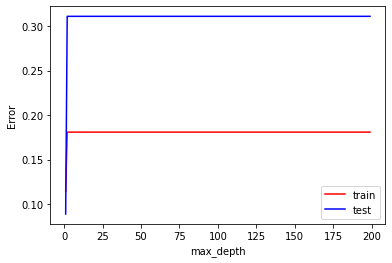

In [45]:
#Plotting error

plt.plot(testrange,train_acc,'r',label='train')
plt.plot(testrange,test_acc,'b',label='test')
plt.xlabel("max_depth")
plt.ylabel("Error")
plt.legend()
plt.show()

In [46]:
train_acc2 = []
test_acc2 = []

testrange2 = range(1,10)

for i in testrange2:
    train_acc2.append(rf_train_depth(i))
    test_acc2.append(rf_test_depth(i))  

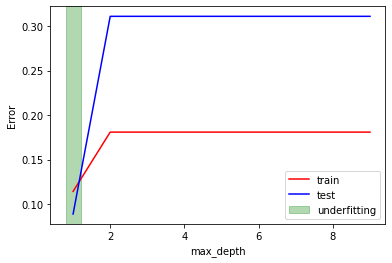

In [47]:
#Plotting error

plt.plot(testrange2,train_acc2,'r',label='train')
plt.plot(testrange2,test_acc2,'b',label='test')
plt.xlabel("max_depth")
plt.ylabel("Error")
plt.axvspan(0.8, 1.2, color='g', alpha=0.3,label='underfitting')
# plt.axvspan(3.5, 8, color='y', alpha=0.3,label='overfitting')
plt.legend()
plt.show()

In [48]:
classifier = RandomForestClassifier(random_state=3)

param_grid = { 
    'n_estimators': [3],
    'max_samples': [10],
    'max_depth' : [x for x in range(1,1000)]
}
classifier = GridSearchCV(estimator=classifier, param_grid=param_grid)

classifier.fit(X_train, y_train)

classifier.best_params_

{'max_depth': 3, 'max_samples': 10, 'n_estimators': 3}

### Sample Optimization on Iris

In [49]:
train_acc = []
test_acc = []

testrange = range(1,int(0.7*X.shape[0])+1)

for i in testrange:
    train_acc.append(rf_train_samples(i))
    test_acc.append(rf_test_samples(i))  

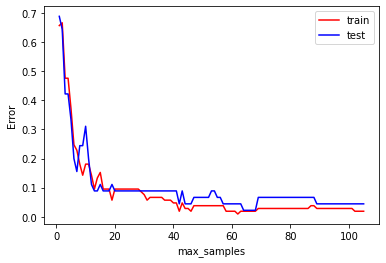

In [50]:
#Plotting error

plt.plot(testrange,train_acc,'r',label='train')
plt.plot(testrange,test_acc,'b',label='test')
plt.xlabel("max_samples")
plt.ylabel("Error")
plt.legend()
plt.show()

In [51]:
train_acc2 = []
test_acc2 = []

testrange2 = range(1,int(0.7*X.shape[0])+1,3)

for i in testrange2:
    train_acc2.append(rf_train_samples(i))
    test_acc2.append(rf_test_samples(i))  


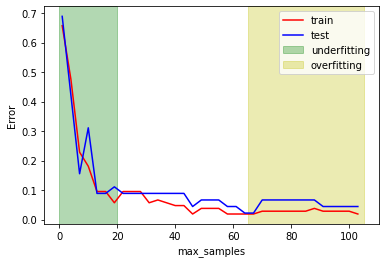

In [52]:

#Plotting error

plt.plot(testrange2,train_acc2,'r',label='train')
plt.plot(testrange2,test_acc2,'b',label='test')
plt.xlabel("max_samples")
plt.ylabel("Error")
plt.axvspan(0, 20, color='g', alpha=0.3,label='underfitting')
plt.axvspan(65, 105, color='y', alpha=0.3,label='overfitting')
plt.legend()
plt.show()

In [53]:
classifier = RandomForestClassifier(random_state=3)

param_grid = { 
    'n_estimators': [3],
    'max_samples': [x for x in range(1,int(0.7*X.shape[0])+1)],
    'max_depth' : [10]
}
classifier = GridSearchCV(estimator=classifier, param_grid=param_grid)

classifier.fit(X_train, y_train)

classifier.best_params_

{'max_depth': 10, 'max_samples': 25, 'n_estimators': 3}

In [54]:
# Initialize a random forest model
# Here, you need to take turns to tune max_depth/max_samples for showing cases of underfitting/overfitting
# Note that when you tune max_depth, please leave max_samples unchanged!
# Similarly, when you tune max_samples, leave max_depth unchanged!

# rf = RandomForestClassifier(max_depth=10, max_samples=10, n_estimators=3, random_state=3)
# rf.fit(X_train, y_train)

In [55]:
# 1-rf.score(X_train, y_train)

In [56]:
# 1-rf.score(X_test, y_test)

## Breast Cancer Dataset

In [57]:
# Load Breast Cancer dataset for random forest
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state = 3)

In [58]:
# # Initialize a random forest model
# rf = RandomForestClassifier(max_depth=10, max_samples=10, n_estimators=3, random_state=3) # change max_depth
# # rf.fit(X_train, y_train)

### Depth optimization Breast Cancer

In [59]:
train_acc = []
test_acc = []

testrange = range(1,5000,5)

for i in testrange:
    train_acc.append(rf_train_depth(i))
    test_acc.append(rf_test_depth(i))  

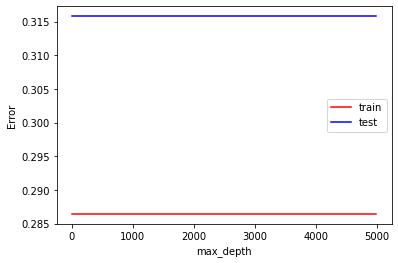

In [60]:
#Plotting error

plt.plot(testrange,train_acc,'r', label='train')
plt.plot(testrange,test_acc,'b', label='test')
plt.xlabel("max_depth")
plt.ylabel("Error")
plt.legend()
plt.show()

In [61]:
train_acc2 = []
test_acc2 = []

testrange2 = range(1,10)

for i in testrange2:
    train_acc2.append(rf_train_depth(i))
    test_acc2.append(rf_test_depth(i))  

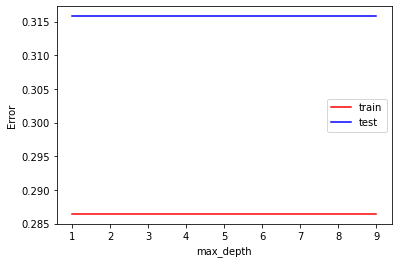

In [62]:
#Plotting error

plt.plot(testrange2,train_acc2,'r',label='train')
plt.plot(testrange2,test_acc2,'b',label='test')
plt.xlabel("max_depth")
plt.ylabel("Error")
plt.legend()
plt.show()

In [63]:
classifier = RandomForestClassifier(random_state=3)

param_grid = { 
    'n_estimators': [3],
    'max_samples': [10],
    'max_depth' : [x for x in range(1,1000)]
}
classifier = GridSearchCV(estimator=classifier, param_grid=param_grid)

classifier.fit(X_train, y_train)

classifier.best_params_

{'max_depth': 1, 'max_samples': 10, 'n_estimators': 3}

### Sample optimization Breast Cancer

In [64]:
train_acc = []
test_acc = []

testrange = range(1,int(0.7*X.shape[0])+1)

for i in testrange:
    train_acc.append(rf_train_samples(i))
    test_acc.append(rf_test_samples(i))  

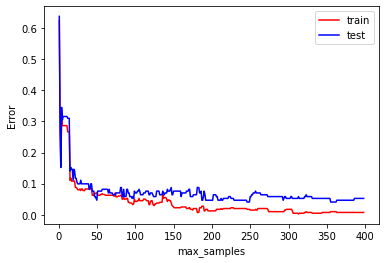

In [65]:
#Plotting error

plt.plot(testrange,train_acc,'r',label="train")
plt.plot(testrange,test_acc,'b',label="test")
plt.xlabel("max_samples")
plt.ylabel("Error")
plt.legend()
plt.show()

In [66]:
train_acc2 = []
test_acc2 = []

testrange2 = range(150,int(0.7*X.shape[0])+1)

for i in testrange2:
    train_acc2.append(rf_train_samples(i))
    test_acc2.append(rf_test_samples(i))  

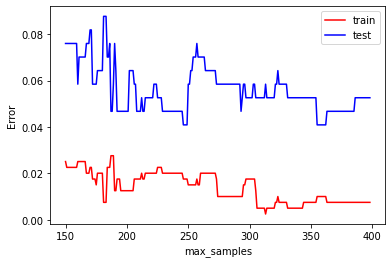

In [67]:
#Plotting error

plt.plot(testrange2,train_acc2,'r',label="train")
plt.plot(testrange2,test_acc2,'b',label="test")
plt.xlabel("max_samples")
plt.ylabel("Error")
plt.legend()
plt.show()

In [68]:
train_acc3 = []
test_acc3 = []

testrange3 = range(1,int(0.7*X.shape[0])+1,10)

for i in testrange3:
    train_acc3.append(rf_train_samples(i))
    test_acc3.append(rf_test_samples(i))  

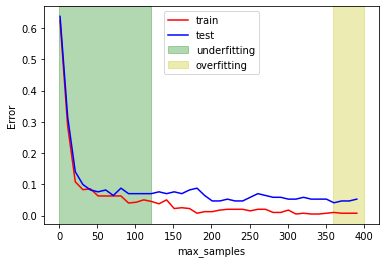

In [69]:
plt.plot(testrange3,train_acc3,'r',label="train")
plt.plot(testrange3,test_acc3,'b',label="test")
plt.xlabel("max_samples")
plt.ylabel("Error")
plt.axvspan(0, 120, color='g', alpha=0.3,label='underfitting')
plt.axvspan(360, 400, color='y', alpha=0.3,label='overfitting')
plt.legend()
plt.show()

In [70]:
classifier = RandomForestClassifier(random_state=3)

param_grid = { 
    'n_estimators': [3],
    'max_samples': [x for x in range(1,int(0.7*X.shape[0])+1)],
    'max_depth' : [10]
}
classifier = GridSearchCV(estimator=classifier, param_grid=param_grid)

classifier.fit(X_train, y_train)

classifier.best_params_

{'max_depth': 10, 'max_samples': 310, 'n_estimators': 3}